In [1]:
from model_nn.create_model import  load_checkpoint
from model_nn.trains import perf_measure, find_classes
from Random_forest_baseline.loader.loader import test_transforms_prepare
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

<h1>Load data</h1>

In [2]:
data_dir = 'Random_forest_baseline/Splited_dataset'
train_dir = data_dir + '/train'
test_dir = data_dir + '/test'

test_transforms = test_transforms_prepare(size=(256,256), center_crop=236, normalize_mean=(0,0,0), normalize_std=(1,1,1))

test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

testloader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True)

<h1>Load model and test</h1>

tensor([30])

 ez az eredeti:
tensor([30])
Original label: Suzuki_wagonR_2015
Predicted label: Suzuki_wagonR_2015


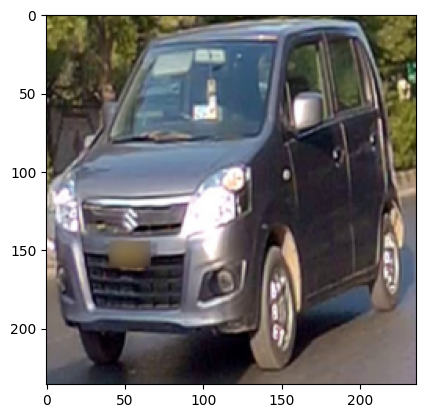

In [4]:
# load model from checkpoint
model = load_checkpoint('./model_nn/cp.pth')
# nums to class names
names = find_classes('./Random_forest_baseline/Splited_dataset/test')
for data in testloader:
    images, labels = data
    # Get probabilities
    outputs = model(images)
    temp = images[0].movedim(0,-1)
    # Turn probabilities into predictions
    _, predicted_outcome = torch.max(outputs.data, 1)
    print(predicted_outcome)
    print('\n ez az eredeti:')
    print(labels)
    print(f'Original label: {names[0][labels[0]]}')
    imgplot = plt.imshow(temp)
    print(f'Predicted label: {names[0][predicted_outcome[0]]}')
    break

<h1>Measure performance</h1>

In [5]:
perf_measure(model, testloader)

Test accuracy of model: 91.611%
